# SigPy for MRI Tutorial Part 2: Parallel Imaging and Compressed Sensing Reconstruction

Welcome again!

In this notebook, we will run `App`'s in SigPy to perform parallel imaging and compressed sensing reconstruction.

go through basic features of SigPy using the non-uniform fast Fourier transform (NUFFT) as an example usage. NUFFT is a core operation in non-Cartesian MRI, but still can be a computational bottleneck in many applications. We will show how SigPy's NUFFT function allows users to easily change parameters and computing devices.

Before moving on to the tutorial, we want to point out our [documentation](https://sigpy.readthedocs.io) if you want to find out more information about each function.



In this notebook, we will show how to run Apps in SigPy.

For a complete list of MRI Apps, please see: https://sigpy.readthedocs.io/en/latest/mri_app.html

# Setup

In addition to Numpy and SigPy, we will need to import the mri submodule `sigpy.mri` for MRI apps.

In [30]:
%matplotlib notebook
import numpy as np
import sigpy as sp
import sigpy.mri as mr
import sigpy.plot as pl

We will be using a 8x undersampled 8-channel brain dataset:

In [31]:
ksp = np.load('data/cartesian_ksp.npy')

A root-sum-of-squares reconstruction looks like this:

<IPython.core.display.Javascript object>


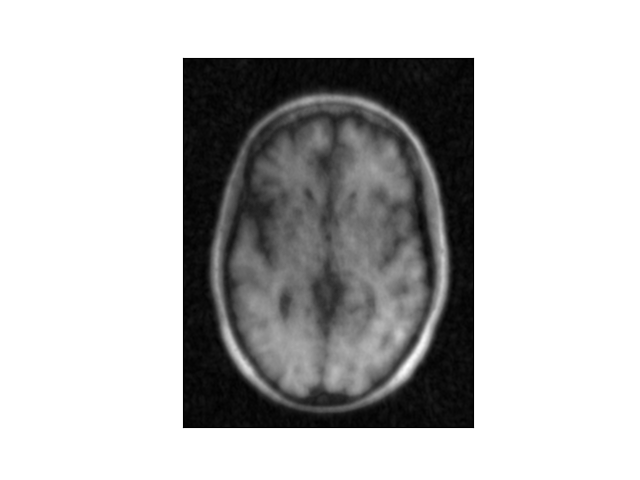

In [32]:
img_rss = np.sum(np.abs(sp.ifft(ksp, axes=(-1, -2)))**2, axis=0)**0.5

pl.ImagePlot(img_rss, hide_axes=True)

## Estimating sensitivity maps using ESPIRiT

We will use ESPIRiT to compute the sensitivity maps. This is provided in SigPy as `mr.espirit_maps`. This function supports GPU with the option `device`.

EspiritCalib: 100%|██████████| 100/100 [00:02<00:00, 44.04it/s]


<IPython.core.display.Javascript object>


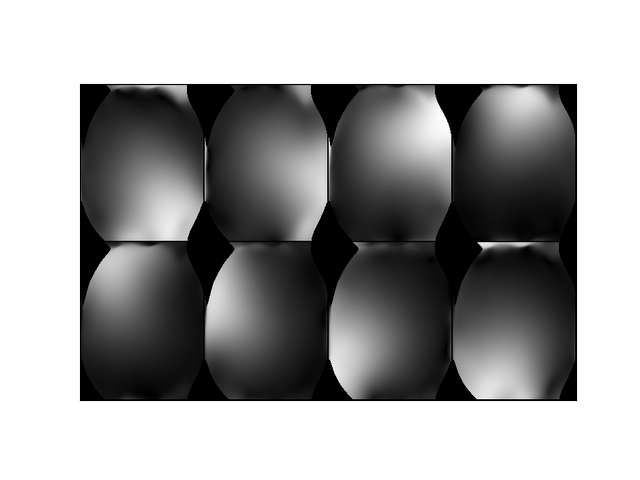

In [28]:
mps = mr.app.EspiritCalib(ksp).run()

pl.ImagePlot(mps, z=0, hide_axes=True)

## SENSE Recon

We will first run the SENSE App. To run an App, simply do, `app.run()`.

All MRI reconstruction Apps support the device option, so they can be run on GPU as well.

SenseRecon: 100%|██████████| 100/100 [00:03<00:00, 32.50it/s, resid=5.90E+03]


<IPython.core.display.Javascript object>


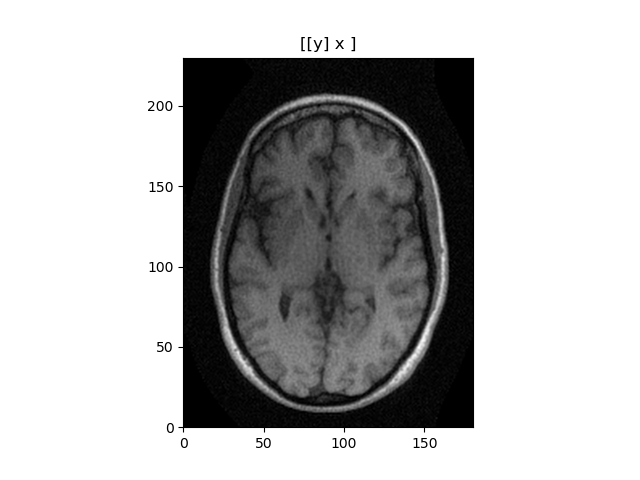

In [22]:
img_sense = mr.app.SenseRecon(ksp, mps, lamda=0.01).run()

pl.ImagePlot(img_sense)

## L1 Wavelet Recon

The L1-wavelet App does the l1-wavelet reconstruction.

L1WaveletRecon: 100%|██████████| 100/100 [00:01<00:00, 51.98it/s, resid=2.43E-03]


<IPython.core.display.Javascript object>


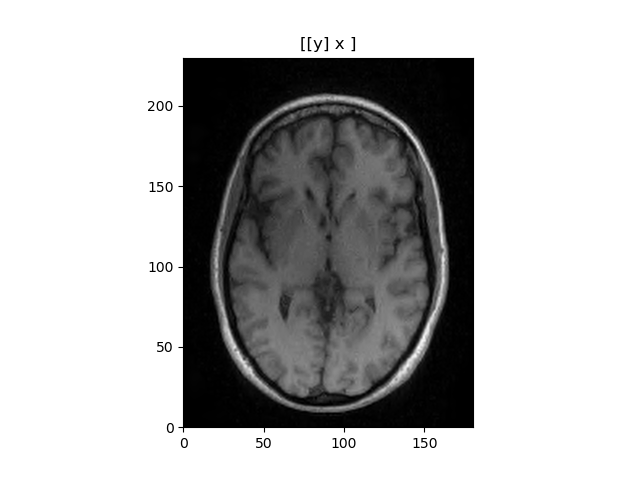

In [12]:
lamda = 0.005
img_l1wav = mr.app.L1WaveletRecon(ksp, mps, lamda, device=0).run()

pl.ImagePlot(img_l1wav)

# Total Variation Recon

And we can do total variation regularized reconstruction.

TotalVariationRecon: 100%|██████████| 100/100 [00:05<00:00, 18.80it/s, resid=1.65E-02]


<IPython.core.display.Javascript object>


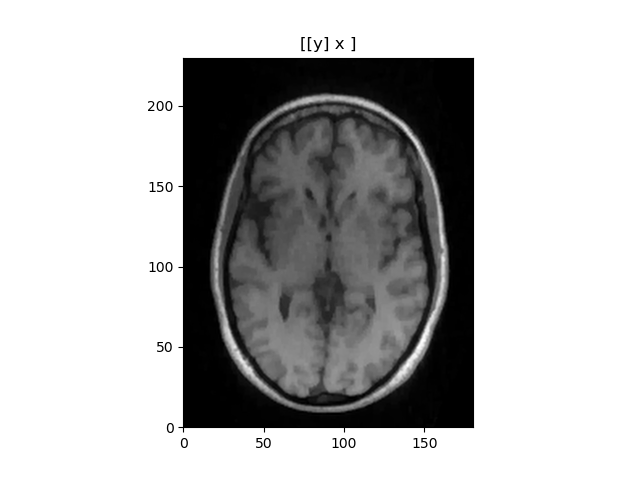

In [13]:
lamda = 0.005
img_tv = mr.app.TotalVariationRecon(ksp, mps, lamda).run()

pl.ImagePlot(img_tv)